In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import pickle

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [4]:
import os
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [83]:
S_and_P_500_URL = 'https://www.slickcharts.com/sp500'
response = requests.get(S_and_P_500_URL)
response.status_code

200

In [84]:
S_and_P_page = response.text
S_and_P_soup = BeautifulSoup(S_and_P_page)
#print(S_and_P_soup)

In [14]:
S_and_P_DF = pd.DataFrame(columns = ('Company', 'Symbol', 'Weight'))
display(S_and_P_DF)

,Company,Symbol,Weight


In [85]:
#List_of_Companies = []
#List_of_Symbols = []
#List_of_Weights = []
List_of_Rows = list(S_and_P_soup.find_all('tr'))
print((List_of_Rows))

[<tr>
<th scope="col">#</th>
<th scope="col" style="width: 30%">Company</th>
<th scope="col">Symbol</th>
<th scope="col">Weight</th>
<th scope="col">      Price</th>
<th scope="col">Chg</th>
<th scope="col">% Chg</th>
</tr>, <tr>
<td>1</td>
<td><a href="/symbol/AAPL">Apple Inc.</a></td>
<td><a href="/symbol/AAPL">AAPL</a></td>
<td>4.827205</td>
<td class="text-nowrap"><img alt="" src="/img/down.gif"/>   316.69</td>
<td class="text-nowrap" style="color: red">-2.04</td>
<td class="text-nowrap" style="color: red">(-0.64%)</td>
</tr>, <tr>
<td>2</td>
<td><a href="/symbol/MSFT">Microsoft Corporation</a></td>
<td><a href="/symbol/MSFT">MSFT</a></td>
<td>4.622491</td>
<td class="text-nowrap"><img alt="" src="/img/down.gif"/>   166.56</td>
<td class="text-nowrap" style="color: red">-0.54</td>
<td class="text-nowrap" style="color: red">(-0.32%)</td>
</tr>, <tr>
<td>3</td>
<td><a href="/symbol/AMZN">Amazon.com Inc.</a></td>
<td><a href="/symbol/AMZN">AMZN</a></td>
<td>2.816235</td>
<td class="te

In [104]:
Index = 0

List_of_Closings = []

First_Value_Found = False

while((First_Value_Found == False) and (Index < len(List_of_Rows))):
    
    Row = str(List_of_Rows[Index])
    if('Apple Inc.' in Row):
        First_Value_Found = True
    else:
        Index += 1

while(Index < len(List_of_Rows)):
    
    Row = str(List_of_Rows[Index])
    
    TD_List = list(Row.split('/td'))
    
    Price_String = TD_List[4]
    
    Sub_Index = (len(Price_String)-1)
    
    while(Price_String[Sub_Index] != " "):
        Sub_Index -= 1
    Sub_Index += 2
    End_Index = Sub_Index
    while(Price_String[End_Index] != "<"):
        End_Index += 1
    print(Price_String[Sub_Index:End_Index])
    List_of_Closings.append((Price_String[Sub_Index:End_Index]).strip("\xa0"))
    
    Index += 1
    
print(List_of_Closings)

 316.69
 166.56
 1,892.30
 221.22
 228.50
 1,483.00
 1,483.50
 136.92
 150.25
 207.54
 126.01
 67.68
 321.91
 300.30
 34.30
 38.47
 143.80
 60.70
 232.95
 60.27
 90.10
 40.39
 57.17
 113.48
 47.32
 48.80
 141.80
 49.15
 79.99
 311.30
 351.49
 115.59
 185.31
 211.25
 120.32
 89.93
 67.44
 247.90
 343.70
 237.19
 88.62
 116.16
 337.26
 313.26
 209.15
 180.93
 104.55
 87.95
 182.46
 154.12
 257.98
 131.49
 144.30
 307.33
 55.50
 140.91
 211.73
 92.40
 94.32
 425.10
 164.26
 179.79
 236.73
 11.67
 74.77
 50.97
 120.93
 147.62
 130.50
 1,994.00
 117.11
 145.80
 245.70
 62.57
 213.00
 55.70
 501.13
 54.42
 305.99
 176.20
 62.30
 56.28
 277.53
 206.86
 284.51
 296.20
 63.93
 55.90
 68.00
 152.74
 603.00
 84.03
 120.59
 94.50
 214.17
 151.65
 141.93
 228.44
 58.98
 529.14
 192.58
 43.79
 71.24
 233.99
 148.21
 378.13
 95.57
 114.04
 198.79
 74.83
 312.00
 63.22
 113.96
 51.13
 172.86
 48.45
 204.62
 96.76
 36.99
 177.88
 237.18
 287.19
 590.00
 211.26
 84.00
 144.59
 242.60
 216.49
 195.54
 22

In [16]:
Index = 0

First_Value_Found = False

while((First_Value_Found == False) and (Index < len(List_of_Rows))):
    
    Row = str(List_of_Rows[Index])
    if('Apple Inc.' in Row):
        First_Value_Found = True
    else:
        Index += 1

while(Index < len(List_of_Rows)):
    
    Row = str(List_of_Rows[Index])
    Sub_Index = 13
    
    Company_Appended = False
    Symbol_Appended = False
    Weight_Appended = False
    
    while(Company_Appended == False):
        
        if(Row[Sub_Index:(Sub_Index+7)] == '<a href'):
            Sub_Index += 18
            while(Row[Sub_Index] != '>'):
                Sub_Index += 1
            Sub_Index += 1
            Ending_Index = Sub_Index
            while(Row[Ending_Index] != '<'):
                Ending_Index += 1
            List_of_Companies.append(str(Row[Sub_Index:Ending_Index]))
            Company_Appended = True
        else:
            Sub_Index += 1
            
    Sub_Index += 13
            
    while(Symbol_Appended == False):
        
        if(Row[Sub_Index:(Sub_Index+7)] == '<a href'):
            Sub_Index += 18
            while(Row[Sub_Index] != '>'):
                Sub_Index += 1
            Sub_Index += 1
            Ending_Index = Sub_Index
            while(Row[Ending_Index] != '<'):
                Ending_Index += 1
            List_of_Symbols.append(str(Row[Sub_Index:Ending_Index]))
            Symbol_Appended = True
        else:
            Sub_Index += 1
            
    Sub_Index += 9
    
    while(Weight_Appended == False):
        
        if(Row[Sub_Index:(Sub_Index+4)] == '<td>'):
            Sub_Index += 4
            Ending_Index = Sub_Index
            while(Row[Ending_Index] != '<'):
                Ending_Index += 1
            List_of_Weights.append(float(Row[Sub_Index:Ending_Index]))
            Weight_Appended = True
        else:
            Sub_Index += 1
            
    Index += 1

In [17]:
S_and_P_DF['Company'] = List_of_Companies
S_and_P_DF['Symbol'] = List_of_Symbols

display(S_and_P_DF)

,Company,Symbol,Weight
0,Apple Inc.,AAPL,NaN
1,Microsoft Corporation,MSFT,NaN
2,Amazon.com Inc.,AMZN,NaN
3,Facebook Inc. Class A,FB,NaN
4,Berkshire Hathaway Inc. Class B,BRK.B,NaN
...,...,...,...
500,Gap Inc.,GPS,NaN
501,Under Armour Inc. Class A,UAA,NaN
502,Under Armour Inc. Class C,UA,NaN
503,Coty Inc. Class A,COTY,NaN


In [18]:
S_and_P_DF['Weight'] = List_of_Weights

display(S_and_P_DF)

,Company,Symbol,Weight
0,Apple Inc.,AAPL,4.827205
1,Microsoft Corporation,MSFT,4.622491
2,Amazon.com Inc.,AMZN,2.816235
3,Facebook Inc. Class A,FB,1.938432
4,Berkshire Hathaway Inc. Class B,BRK.B,1.632778
...,...,...,...
500,Gap Inc.,GPS,0.014427
501,Under Armour Inc. Class A,UAA,0.013431
502,Under Armour Inc. Class C,UA,0.012873
503,Coty Inc. Class A,COTY,0.011980


In [45]:
List_of_Yahoo_Finance_History_URLs = []

for symbol in List_of_Symbols:
    
    Historical_Data_URL = 'https://finance.yahoo.com/quote/' + str(symbol) + '/history?p=' + str(symbol)
    List_of_Yahoo_Finance_History_URLs.append(Historical_Data_URL)
    
#print(len(List_of_Yahoo_Finance_History_URLs))

Berkshire = (List_of_Yahoo_Finance_History_URLs.index('https://finance.yahoo.com/quote/BRK.B/history?p=BRK.B'))
Brown_Forman = (List_of_Yahoo_Finance_History_URLs.index('https://finance.yahoo.com/quote/BF.B/history?p=BF.B'))

List_of_Yahoo_Finance_History_URLs[Berkshire] = 'https://finance.yahoo.com/quote/BRK-B/history?p=BRK-B'
List_of_Yahoo_Finance_History_URLs[Brown_Forman] = 'https://finance.yahoo.com/quote/BF-B/history?p=BF-B'

In [47]:
#Pulls Historic Data from earliest scrapable date

List_of_Historic_Closing_Prices = []
List_of_Historic_Adjusted_Closing_Prices = []

URLs_Not_Appended = []
URLs_Multiple_Appended = []

for URL in List_of_Yahoo_Finance_History_URLs:
    
    Added = False
    Appends = 0
    
    response = requests.get(URL)
    
    Historic_Data_Text = response.text
    
    Historic_Data_List = list((Historic_Data_Text).split("<tr"))

    for Row in Historic_Data_List:
        if("Sep 05, 2019" in Row):
            Span_List = list(Row.split("<span"))
            Append_List = []
            for Span in Span_List:
                Index = 0
                while(Span[Index] != ">"):
                    Index += 1
                Index += 1
                End_Index = Index
                while(Span[End_Index] != "<"):
                    End_Index += 1
                Append_List.append(Span[Index:End_Index])
            if(len(Append_List) > 6):
                List_of_Historic_Closing_Prices.append(Append_List[5])
                List_of_Historic_Adjusted_Closing_Prices.append(Append_List[6])
                Added = True
                Appends += 1
                
    if(Added == False):
        URLs_Not_Appended.append(URL)
        
    if(Appends > 1):
        URLs_Multiple_Appended.append(URL)
        
    print(len(List_of_Historic_Closing_Prices))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [48]:
print(URLs_Not_Appended)
print(URLs_Multiple_Appended)

[]
[]


In [49]:
print(len(List_of_Historic_Closing_Prices))
print(len(List_of_Historic_Adjusted_Closing_Prices))

505
505


In [50]:
#S_and_P_DF['Aug 28, 2019 Open'] = List_of_Historic_Opens
#S_and_P_DF['Aug 28, 2019 High'] = List_of_Historic_Highs
#S_and_P_DF['Aug 28, 2019 Low'] = List_of_Historic_Lows
S_and_P_DF['Sep 05, 2019 Close'] = List_of_Historic_Closing_Prices
S_and_P_DF['Sep 05, 2019 Adjusted Close'] = List_of_Historic_Adjusted_Closing_Prices
#S_and_P_DF['Aug 28, 2019 Volume'] = List_of_Historic_Volumes

In [51]:
display(S_and_P_DF)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close"
0,Apple Inc.,AAPL,4.827205,213.28,212.64
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72"
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90
4,Berkshire Hathaway Inc. Class B,BRK.B,1.632778,204.24,204.24
...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68


In [254]:
display(S_and_P_DF)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294
2,Amazon.com Inc.,AMZN,2.816235,1840.72,1840.72,1892.3,51.58,0.028022
3,Facebook Inc. Class A,FB,1.938432,190.9,190.9,221.22,30.32,0.158827
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.5,24.26,0.118782
...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14,1.62,0.098063
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02,0.25,0.012645
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02,0.11,0.006142
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85,1.17,0.120868


In [54]:
S_and_P_DF.describe()

,Weight
count,505.000000
mean,0.197992
std,0.400005
min,0.006791
25%,0.048524
50%,0.084058
75%,0.179367
max,4.827205


In [5]:
with open('S_and_P_data.pkl','rb') as read_file:
    S_and_P_DF = pickle.load(read_file)
    
display(S_and_P_DF)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30",51.58,0.028022
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22,30.32,0.158827
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50,24.26,0.118782
...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14,1.62,0.098063
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02,0.25,0.012645
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02,0.11,0.006142
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85,1.17,0.120868


In [64]:
List_of_2019_Financials_URLs = []

for symbol in List_of_Symbols:
    
    URL = 'https://www.nasdaq.com/market-activity/stocks/' + str(symbol) + '/financials'
    
    List_of_2019_Financials_URLs.append(URL)
    
#print(List_of_2019_Financials_URLs)

In [66]:
Test_AAPL = List_of_2019_Financials_URLs[0]
response = requests.get(Test_AAPL)
response.status_code

200

In [81]:
List_of_January_21_Closing = []



In [112]:
from collections import defaultdict
Dictionary_of_Industries = defaultdict(string)

In [109]:
response = requests.get('https://datahub.io/core/s-and-p-500-companies')
response.status_code

200

In [118]:
driver = webdriver.Chrome(chromedriver)
driver.get('https://datahub.io/core/s-and-p-500-companies')

In [141]:
Industry_Soup = BeautifulSoup(driver.page_source, "html5lib")

In [142]:
t = Industry_Soup.find(class_='htCore')

In [143]:
symbol = []
name = []
industry = []
l = t.find_all(class_='htLeft')
while l:
    industry.append(l.pop().text)
    name.append(l.pop().text)
    symbol.append(l.pop().text)

In [105]:
S_and_P_DF['Jan 21, 2020 Closing Price'] = List_of_Closings

In [257]:
display(S_and_P_DF)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price"
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30"
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50
...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85


In [246]:
#def NoCommas(string):
    
#    Output = ""
#    String_Index = 0
    
#    while(String_Index < len(string)):
#        if(string[String_Index] == ","):
#            pass
#        else:
#            Output = Output + str(string[String_Index])
            
#        String_Index += 1
        
#    return Output

#Index = 0

#while(Index < len(S_and_P_DF)):
#    S_and_P_DF['Jan 21, 2020 Closing Price'][Index] = float(S_and_P_DF['Jan 21, 2020 Closing Price'][Index])
#    S_and_P_DF['Sep 05, 2019 Close'][Index] = float(S_and_P_DF['Sep 05, 2019 Close'][Index])
#    S_and_P_DF['Sep 05, 2019 Adjusted Close'][Index] = float(S_and_P_DF['Sep 05, 2019 Adjusted Close'][Index])
#    Index += 1

display(S_and_P_DF)
S_and_P_DF.info()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price"
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56
2,Amazon.com Inc.,AMZN,2.816235,1840.72,1840.72,1892.3
3,Facebook Inc. Class A,FB,1.938432,190.9,190.9,221.22
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.5
...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
Company                        505 non-null object
Symbol                         505 non-null object
Weight                         505 non-null float64
Sep 05, 2019 Close             505 non-null object
Sep 05, 2019 Adjusted Close    505 non-null object
Jan 21, 2020 Closing Price     505 non-null object
dtypes: float64(1), object(5)
memory usage: 23.8+ KB


In [250]:
Index = 0

List_of_Increases = []
List_of_Percent_Increases = []

while(Index < len(S_and_P_DF)):
    Inc = (float(S_and_P_DF['Jan 21, 2020 Closing Price'][Index]) - float(S_and_P_DF['Sep 05, 2019 Adjusted Close'][Index]))
    Per = Inc/float(S_and_P_DF['Sep 05, 2019 Adjusted Close'][Index])
    
    List_of_Increases.append(Inc)
    List_of_Percent_Increases.append(Per)
    
    Index += 1

print(len(List_of_Increases))
print(len(List_of_Percent_Increases))

505
505


In [258]:
S_and_P_DF['Gross Increase'] = List_of_Increases
S_and_P_DF['Percent Increase'] = List_of_Percent_Increases
display(S_and_P_DF)
S_and_P_DF.describe()

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30",51.58,0.028022
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22,30.32,0.158827
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50,24.26,0.118782
...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14,1.62,0.098063
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02,0.25,0.012645
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02,0.11,0.006142
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85,1.17,0.120868


,Weight,Gross Increase,Percent Increase
count,505.000000,505.000000,505.000000
mean,0.197992,13.822000,0.112124
std,0.400005,29.244348,0.122836
min,0.006791,-46.910000,-0.249007
25%,0.048524,1.820000,0.031580
50%,0.084058,6.710000,0.100980
75%,0.179367,17.030000,0.184165
max,4.827205,319.540000,0.623175


# DO NOT RUN UNLESS YOU ARE READY TO OVERWRITE YOUR PICKLE FILE

#with open('S_and_P_data.pkl', 'wb') as picklefile:
    #pickle.dump(S_and_P_DF, picklefile)

In [6]:
display(S_and_P_DF)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30",51.58,0.028022
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22,30.32,0.158827
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50,24.26,0.118782
...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14,1.62,0.098063
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02,0.25,0.012645
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02,0.11,0.006142
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85,1.17,0.120868


In [8]:
Merged_DF_1 = pd.DataFrame(S_and_P_DF.join(Industry_DF.set_index('Symbol'), on='Symbol'))
#Merged_DF_1
Merged_DF_1['Sector'].unique()

array(['Information Technology', 'Consumer Discretionary', nan,
       'Financials', 'Health Care', 'Consumer Staples', 'Energy',
       'Telecommunication Services', 'Industrials', 'Utilities',
       'Real Estate', 'Materials'], dtype=object)

In [10]:
Merged_DF_1['Sector'] = Merged_DF_1.Sector.fillna('Other')
    
display(Merged_DF_1)
Merged_DF_1.head(10)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase,Name,Sector
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325,Apple Inc.,Information Technology
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294,Microsoft Corp.,Information Technology
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30",51.58,0.028022,Amazon.com Inc.,Consumer Discretionary
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22,30.32,0.158827,"Facebook, Inc.",Information Technology
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50,24.26,0.118782,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14,1.62,0.098063,Gap Inc.,Consumer Discretionary
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02,0.25,0.012645,Under Armour Class A,Consumer Discretionary
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02,0.11,0.006142,Under Armour Class C,Consumer Discretionary
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85,1.17,0.120868,"Coty, Inc",Consumer Staples


,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase,Name,Sector
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325,Apple Inc.,Information Technology
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294,Microsoft Corp.,Information Technology
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30",51.58,0.028022,Amazon.com Inc.,Consumer Discretionary
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22,30.32,0.158827,"Facebook, Inc.",Information Technology
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50,24.26,0.118782,NaN,Other
5,Alphabet Inc. Class A,GOOGL,1.607352,"1,212.19","1,212.19","1,483.00",270.81,0.223406,Alphabet Inc Class A,Information Technology
6,Alphabet Inc. Class C,GOOG,1.604528,"1,211.38","1,211.38","1,483.50",272.12,0.224636,Alphabet Inc Class C,Information Technology
7,JPMorgan Chase &amp; Co.,JPM,1.571783,112.37,110.77,136.92,26.15,0.236075,JPMorgan Chase & Co.,Financials
8,Johnson &amp; Johnson,JNJ,1.423621,128.58,127.70,150.25,22.55,0.176586,Johnson & Johnson,Health Care
9,Visa Inc. Class A,V,1.270642,184.73,184.42,207.54,23.12,0.125366,Visa Inc.,Information Technology


In [9]:
#with open('Merged_DF_1.pkl', 'rb') as picklefile:
    #Merged_DF_1 = pickle.load(picklefile)

In [11]:
Uniques = ['Information Technology', 'Consumer Discretionary', 'Financials', 'Health Care', 'Consumer Staples',
           'Energy', 'Telecommunication Services', 'Industrials', 'Utilities','Real Estate', 'Materials']

Information_Tech_List = []
Consumer_Discretionary_List = []
Customer_Staples_List = []
Financials_List = []
Healthcare_List = []
Energy_List = []
Telecom_List = []
Industries_List = []
Utilities_List = []
Real_Estate_List = []
Materials_List = []

List_of_Lists = [Information_Tech_List, Consumer_Discretionary_List, Financials_List, Healthcare_List,
                 Customer_Staples_List, Energy_List, Telecom_List, Industries_List, Utilities_List,
                 Real_Estate_List, Materials_List]

Index = 0

while(Index < len(Merged_DF_1)):
    List_Index = 0
    Industry_Found = False
    while((Industry_Found == False) and (List_Index < len(Uniques))):
        if(Merged_DF_1['Sector'][Index] == Uniques[List_Index]):
            List_of_Lists[List_Index].append(1)
            Industry_Found = True
        else:
            List_of_Lists[List_Index].append(0)
        List_Index += 1
    while(List_Index < len(Uniques)):
        List_of_Lists[List_Index].append(0)
        List_Index += 1
    Index += 1

In [12]:
# Creates Dummy Variables

Merged_DF_1['Information Technology'] = Information_Tech_List
Merged_DF_1['Consumer Discretionary'] = Consumer_Discretionary_List
Merged_DF_1['Financials'] = Financials_List
Merged_DF_1['Health Care'] = Healthcare_List
Merged_DF_1['Consumer Staples'] = Customer_Staples_List
Merged_DF_1['Energy'] = Energy_List
Merged_DF_1['Telecommunication Services'] = Telecom_List
Merged_DF_1['Industrials'] = Industries_List
Merged_DF_1['Utilities'] = Utilities_List
Merged_DF_1['Real Estate'] = Real_Estate_List
Merged_DF_1['Materials'] = Materials_List

display(Merged_DF_1)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase,Name,Sector,...,Consumer Discretionary,Financials,Health Care,Consumer Staples,Energy,Telecommunication Services,Industrials,Utilities,Real Estate,Materials
0,Apple Inc.,AAPL,4.827205,213.28,212.64,316.69,104.05,0.489325,Apple Inc.,Information Technology,...,0,0,0,0,0,0,0,0,0,0
1,Microsoft Corporation,MSFT,4.622491,140.05,139.58,166.56,26.98,0.193294,Microsoft Corp.,Information Technology,...,0,0,0,0,0,0,0,0,0,0
2,Amazon.com Inc.,AMZN,2.816235,"1,840.72","1,840.72","1,892.30",51.58,0.028022,Amazon.com Inc.,Consumer Discretionary,...,1,0,0,0,0,0,0,0,0,0
3,Facebook Inc. Class A,FB,1.938432,190.90,190.90,221.22,30.32,0.158827,"Facebook, Inc.",Information Technology,...,0,0,0,0,0,0,0,0,0,0
4,Berkshire Hathaway Inc. Class B,BRK-B,1.632778,204.24,204.24,228.50,24.26,0.118782,NaN,Other,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014427,16.99,16.52,18.14,1.62,0.098063,Gap Inc.,Consumer Discretionary,...,1,0,0,0,0,0,0,0,0,0
501,Under Armour Inc. Class A,UAA,0.013431,19.77,19.77,20.02,0.25,0.012645,Under Armour Class A,Consumer Discretionary,...,1,0,0,0,0,0,0,0,0,0
502,Under Armour Inc. Class C,UA,0.012873,17.91,17.91,18.02,0.11,0.006142,Under Armour Class C,Consumer Discretionary,...,1,0,0,0,0,0,0,0,0,0
503,Coty Inc. Class A,COTY,0.011980,9.91,9.68,10.85,1.17,0.120868,"Coty, Inc",Consumer Staples,...,0,0,0,1,0,0,0,0,0,0


In [13]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 3)

display(Merged_DF_1)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase,Name,Sector,Information Technology,Consumer Discretionary,Financials,Health Care,Consumer Staples,Energy,Telecommunication Services,Industrials,Utilities,Real Estate,Materials
0,Apple Inc.,AAPL,4.827,213.28,212.64,316.69,104.05,0.489,Apple Inc.,Information Technology,1,0,0,0,0,0,0,0,0,0,0
1,Microsoft Corporation,MSFT,4.622,140.05,139.58,166.56,26.98,0.193,Microsoft Corp.,Information Technology,1,0,0,0,0,0,0,0,0,0,0
2,Amazon.com Inc.,AMZN,2.816,"1,840.72","1,840.72","1,892.30",51.58,0.028,Amazon.com Inc.,Consumer Discretionary,0,1,0,0,0,0,0,0,0,0,0
3,Facebook Inc. Class A,FB,1.938,190.90,190.90,221.22,30.32,0.159,"Facebook, Inc.",Information Technology,1,0,0,0,0,0,0,0,0,0,0
4,Berkshire Hathaway Inc. Class B,BRK-B,1.633,204.24,204.24,228.50,24.26,0.119,NaN,Other,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014,16.99,16.52,18.14,1.62,0.098,Gap Inc.,Consumer Discretionary,0,1,0,0,0,0,0,0,0,0,0
501,Under Armour Inc. Class A,UAA,0.013,19.77,19.77,20.02,0.25,0.013,Under Armour Class A,Consumer Discretionary,0,1,0,0,0,0,0,0,0,0,0
502,Under Armour Inc. Class C,UA,0.013,17.91,17.91,18.02,0.11,0.006,Under Armour Class C,Consumer Discretionary,0,1,0,0,0,0,0,0,0,0,0
503,Coty Inc. Class A,COTY,0.012,9.91,9.68,10.85,1.17,0.121,"Coty, Inc",Consumer Staples,0,0,0,0,1,0,0,0,0,0,0


In [17]:
Merged_DF_2 = Merged_DF_1

AttributeError: 'Rectangle' object has no property 'errors'

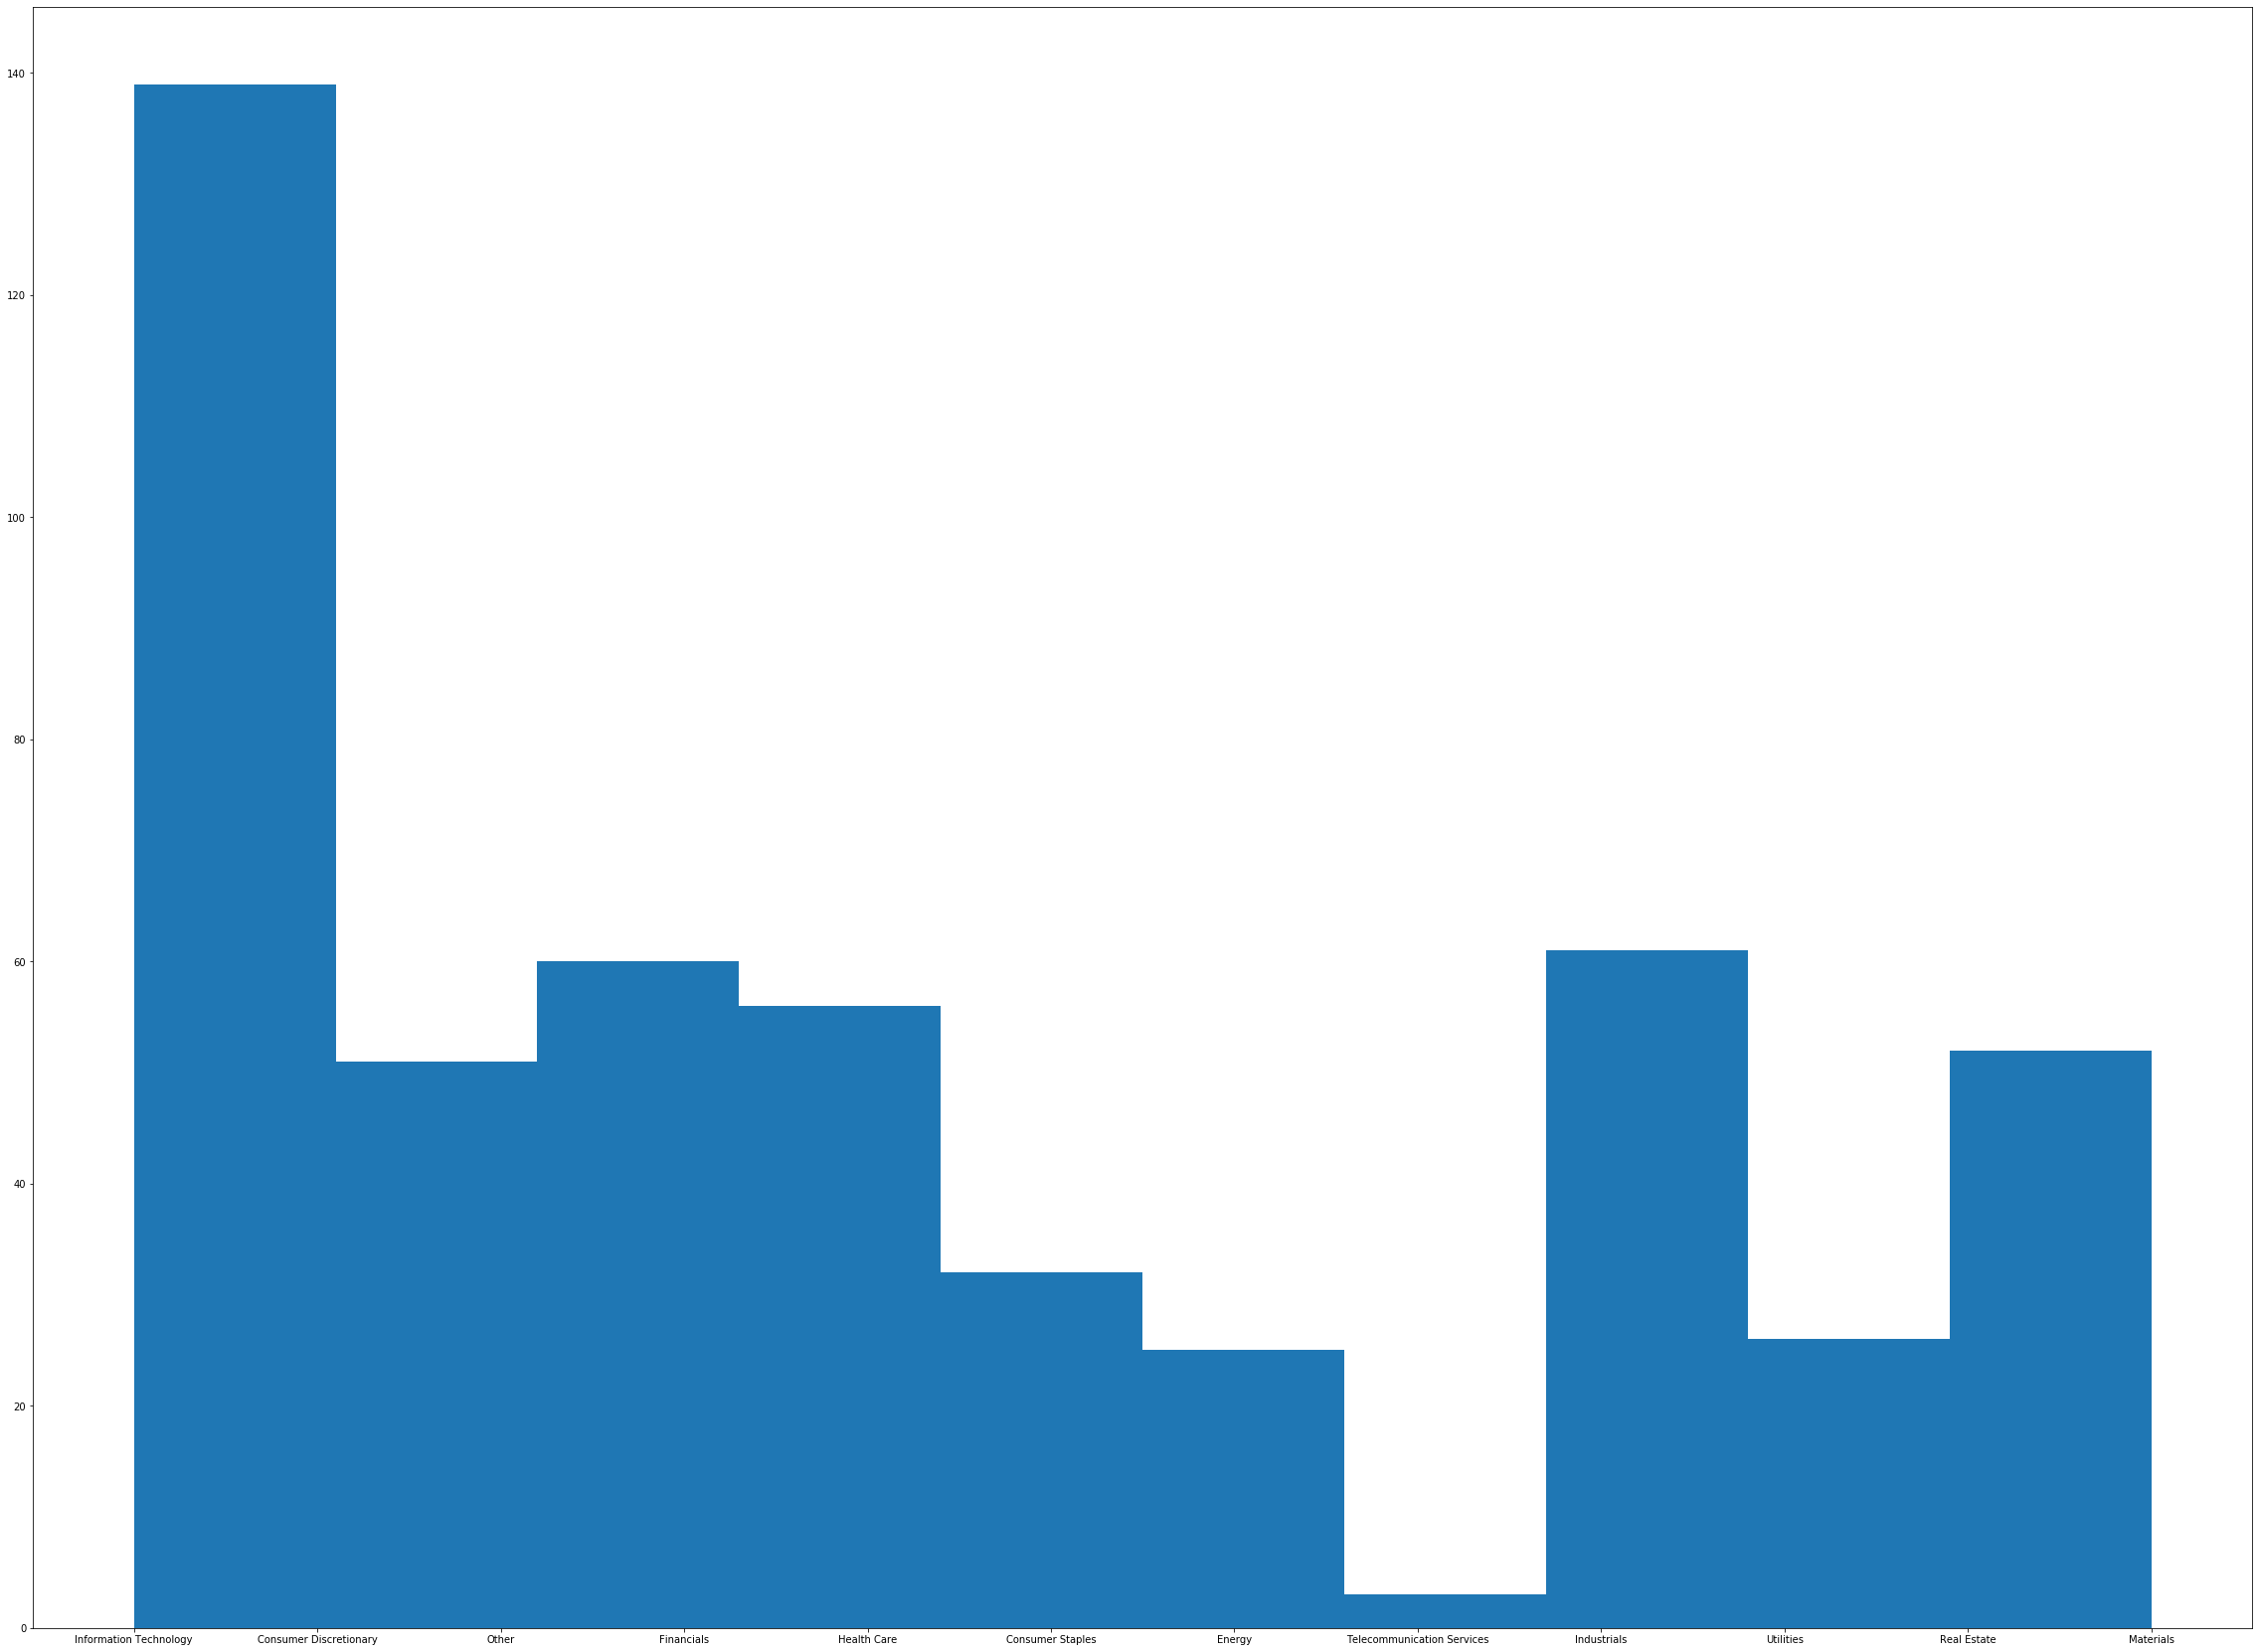

In [14]:
%matplotlib inline

plt.figure(figsize=(40,30))
plt.hist(Merged_DF_1['Sector'], errors='ignore');

In [300]:
#import seaborn as sns
#sns.set()   #Set seaborn default style

#plt.hist(Merged_DF_1['Sector'], ['sepal length (cm)'])

# DO NOT RUN UNLESS YOU ARE READY TO OVERWRITE YOUR PICKLE FILE

#with open('Merged_DF_1.pkl', 'wb') as picklefile:
    #pickle.dump(Merged_DF_1, picklefile)

In [7]:
Industry_DF = pd.read_csv('/Users/brucesfiles/Downloads/constituents_csv.csv')

display(Industry_DF)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
...,...,...,...
500,XYL,Xylem Inc.,Industrials
501,YUM,Yum! Brands Inc,Consumer Discretionary
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials


In [221]:
symbol = []
name = []
value = []

In [222]:
for i, s in enumerate(Industry_DF.Symbol):
    l = 'https://finance.yahoo.com/quote/' + s + '/financials?p=' + s
    response = requests.get(l)
    soup = BeautifulSoup(response.text, "html5lib")
    t = soup.find(class_='D(tbrg)')
    if t:
        for rows in t.find_all(class_='D(tbr)'):
            elems = rows.find_all(class_='D(tbc)')
            symbol.append(s)
            name.append(elems[0].text)
            value.append(elems[1].text)
    if i%10==0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


In [223]:
df_stats = pd.DataFrame()
df_stats['symbol'] = symbol
df_stats['name'] = name
df_stats['value'] = value

In [224]:
df_stats2 = df_stats.groupby(['symbol','name']).max()

In [225]:
df_stats2 = df_stats2.unstack(1)

In [226]:
df_stats2.columns = df_stats2.columns.droplevel()

In [227]:
df_stats2

name,Basic,Cost of Revenue,Diluted,EBITDA,Gross Profit,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Interest Expense,Net Income,Net Income available to common shareholders,Operating Expenses,Operating Income or Loss,Reported EPS,Research Development,Selling General and Administrative,Total Operating Expenses,Total Other Income/Expenses Net,Total Revenue,Weighted average shares outstanding
symbol,,,,,,,,,,,,,,,,,,,,
A,-,"2,307,000",-,-,"2,783,000","932,000","-140,000","1,072,000","71,000","1,072,000","1,072,000",,"959,000",,"404,000","1,420,000","1,824,000","4,000","5,090,000",
AAL,-,"34,733,000",-,-,"10,660,000","2,080,000","484,000","1,596,000","1,098,000","1,596,000","1,596,000",,"3,569,000",,-,"1,970,000","7,091,000","-528,000","45,393,000",
AAP,-,"5,446,840",-,-,"4,254,621","587,564","143,133","444,431","45,037","444,431","444,431",,"635,294",,-,"3,619,327","3,619,327","-2,693","9,701,461",
AAPL,-,"160,871,000",-,-,"98,163,000","66,031,000","10,336,000","55,695,000","3,634,000","55,695,000","55,695,000",,"64,423,000",,"15,857,000","17,883,000","33,740,000","76,000","259,034,000",
ABBV,-,"7,455,000",-,-,"25,412,000","2,979,000","-276,000","3,255,000","1,605,000","3,255,000","3,232,000",,"7,132,000",,"11,360,000","6,920,000","18,280,000","-2,780,000","32,867,000",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STZ,-,"4,142,200",-,-,"4,095,600","96,100","-765,700","861,800","447,800","829,300","829,300",,"2,415,700",,-,"1,679,900","1,679,900","-1,871,800","8,237,800",
T,-,"84,714,000",-,-,"97,651,000","21,075,000","3,674,000","17,401,000","8,485,000","16,367,000","16,367,000",,"28,840,000",,-,"39,663,000","68,811,000","720,000","182,365,000",
XEC,-,"1,389,903",-,-,"939,943","636,990","144,656","492,334","39,503","492,334","481,285",,"655,327",,-,"112,773","284,616","21,166","2,329,846",


In [228]:
# DO NOT RUN UNLESS YOU ARE READY TO OVERWRITE PKL FILE

#import pickle

#with open('my_data.pkl', 'wb') as picklefile:
    #pickle.dump(df_stats2, picklefile)

In [15]:
with open('my_data.pkl', 'rb') as picklefile:
    df_stats2 = pickle.load(picklefile)
df_stats2

name,Basic,Cost of Revenue,Diluted,EBITDA,Gross Profit,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Interest Expense,Net Income,Net Income available to common shareholders,Operating Expenses,Operating Income or Loss,Reported EPS,Research Development,Selling General and Administrative,Total Operating Expenses,Total Other Income/Expenses Net,Total Revenue,Weighted average shares outstanding
symbol,,,,,,,,,,,,,,,,,,,,
A,-,"2,307,000",-,-,"2,783,000","932,000","-140,000","1,072,000","71,000","1,072,000","1,072,000",,"959,000",,"404,000","1,420,000","1,824,000","4,000","5,090,000",
AAL,-,"34,733,000",-,-,"10,660,000","2,080,000","484,000","1,596,000","1,098,000","1,596,000","1,596,000",,"3,569,000",,-,"1,970,000","7,091,000","-528,000","45,393,000",
AAP,-,"5,446,840",-,-,"4,254,621","587,564","143,133","444,431","45,037","444,431","444,431",,"635,294",,-,"3,619,327","3,619,327","-2,693","9,701,461",
AAPL,-,"160,871,000",-,-,"98,163,000","66,031,000","10,336,000","55,695,000","3,634,000","55,695,000","55,695,000",,"64,423,000",,"15,857,000","17,883,000","33,740,000","76,000","259,034,000",
ABBV,-,"7,455,000",-,-,"25,412,000","2,979,000","-276,000","3,255,000","1,605,000","3,255,000","3,232,000",,"7,132,000",,"11,360,000","6,920,000","18,280,000","-2,780,000","32,867,000",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STZ,-,"4,142,200",-,-,"4,095,600","96,100","-765,700","861,800","447,800","829,300","829,300",,"2,415,700",,-,"1,679,900","1,679,900","-1,871,800","8,237,800",
T,-,"84,714,000",-,-,"97,651,000","21,075,000","3,674,000","17,401,000","8,485,000","16,367,000","16,367,000",,"28,840,000",,-,"39,663,000","68,811,000","720,000","182,365,000",
XEC,-,"1,389,903",-,-,"939,943","636,990","144,656","492,334","39,503","492,334","481,285",,"655,327",,-,"112,773","284,616","21,166","2,329,846",


# DO NOT RUN UNLESS YOU ARE READY TO OVERWRITE PKL FILE

#with open('Merged_DF_2.pkl', 'wb') as picklefile:
    #pickle.dump(Merged_DF_2, picklefile)

In [21]:
#display(Merged_DF_2)

In [23]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 244)
pd.set_option('display.precision', 3)

df_stats2

name,Basic,Cost of Revenue,Diluted,EBITDA,Gross Profit,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Interest Expense,Net Income,Net Income available to common shareholders,Operating Expenses,Operating Income or Loss,Reported EPS,Research Development,Selling General and Administrative,Total Operating Expenses,Total Other Income/Expenses Net,Total Revenue,Weighted average shares outstanding
symbol,,,,,,,,,,,,,,,,,,,,
A,-,"2,307,000",-,-,"2,783,000","932,000","-140,000","1,072,000","71,000","1,072,000","1,072,000",,"959,000",,"404,000","1,420,000","1,824,000","4,000","5,090,000",
AAL,-,"34,733,000",-,-,"10,660,000","2,080,000","484,000","1,596,000","1,098,000","1,596,000","1,596,000",,"3,569,000",,-,"1,970,000","7,091,000","-528,000","45,393,000",
AAP,-,"5,446,840",-,-,"4,254,621","587,564","143,133","444,431","45,037","444,431","444,431",,"635,294",,-,"3,619,327","3,619,327","-2,693","9,701,461",
AAPL,-,"160,871,000",-,-,"98,163,000","66,031,000","10,336,000","55,695,000","3,634,000","55,695,000","55,695,000",,"64,423,000",,"15,857,000","17,883,000","33,740,000","76,000","259,034,000",
ABBV,-,"7,455,000",-,-,"25,412,000","2,979,000","-276,000","3,255,000","1,605,000","3,255,000","3,232,000",,"7,132,000",,"11,360,000","6,920,000","18,280,000","-2,780,000","32,867,000",
ABC,-,-,-,-,-,-,-,-,-,-,-,,-,,-,-,-,-,-,
ABT,-,"12,988,000",-,-,"18,367,000","3,784,000","491,000","3,293,000","692,000","3,292,000","3,292,000",,"4,308,000",,"2,407,000","9,711,000","14,059,000","65,000","31,355,000",
ACN,-,"30,206,967",-,-,"13,067,277","6,147,659","1,398,595","4,749,064","20,625","4,678,209","4,678,209",,"6,145,527",,-,"6,921,750","6,921,750","-60,112","43,274,244",
ADBE,-,"1,579,998",-,-,"9,063,979","2,946,811","168,974","2,777,837","148,572","2,777,837","2,777,837",,"3,018,735",,"1,846,380","4,033,386","6,045,244","3,961","10,643,977",


In [25]:
df_stats2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, A to XRAY
Data columns (total 20 columns):
Basic                                          244 non-null object
Cost of Revenue                                244 non-null object
Diluted                                        244 non-null object
EBITDA                                         244 non-null object
Gross Profit                                   244 non-null object
Income Before Tax                              244 non-null object
Income Tax Expense                             244 non-null object
Income from Continuing Operations              244 non-null object
Interest Expense                               244 non-null object
Net Income                                     244 non-null object
Net Income available to common shareholders    244 non-null object
Operating Expenses                             244 non-null object
Operating Income or Loss                       244 non-null object
Reported EPS                

In [36]:
df_stats2['Symbol'] = df_stats2.index

In [37]:
display(df_stats2)

name,Basic,Cost of Revenue,Diluted,EBITDA,Gross Profit,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Interest Expense,Net Income,Net Income available to common shareholders,Operating Expenses,Operating Income or Loss,Reported EPS,Research Development,Selling General and Administrative,Total Operating Expenses,Total Other Income/Expenses Net,Total Revenue,Weighted average shares outstanding,Symbol
symbol,,,,,,,,,,,,,,,,,,,,,
A,-,"2,307,000",-,-,"2,783,000","932,000","-140,000","1,072,000","71,000","1,072,000","1,072,000",,"959,000",,"404,000","1,420,000","1,824,000","4,000","5,090,000",,A
AAL,-,"34,733,000",-,-,"10,660,000","2,080,000","484,000","1,596,000","1,098,000","1,596,000","1,596,000",,"3,569,000",,-,"1,970,000","7,091,000","-528,000","45,393,000",,AAL
AAP,-,"5,446,840",-,-,"4,254,621","587,564","143,133","444,431","45,037","444,431","444,431",,"635,294",,-,"3,619,327","3,619,327","-2,693","9,701,461",,AAP
AAPL,-,"160,871,000",-,-,"98,163,000","66,031,000","10,336,000","55,695,000","3,634,000","55,695,000","55,695,000",,"64,423,000",,"15,857,000","17,883,000","33,740,000","76,000","259,034,000",,AAPL
ABBV,-,"7,455,000",-,-,"25,412,000","2,979,000","-276,000","3,255,000","1,605,000","3,255,000","3,232,000",,"7,132,000",,"11,360,000","6,920,000","18,280,000","-2,780,000","32,867,000",,ABBV
ABC,-,-,-,-,-,-,-,-,-,-,-,,-,,-,-,-,-,-,,ABC
ABT,-,"12,988,000",-,-,"18,367,000","3,784,000","491,000","3,293,000","692,000","3,292,000","3,292,000",,"4,308,000",,"2,407,000","9,711,000","14,059,000","65,000","31,355,000",,ABT
ACN,-,"30,206,967",-,-,"13,067,277","6,147,659","1,398,595","4,749,064","20,625","4,678,209","4,678,209",,"6,145,527",,-,"6,921,750","6,921,750","-60,112","43,274,244",,ACN
ADBE,-,"1,579,998",-,-,"9,063,979","2,946,811","168,974","2,777,837","148,572","2,777,837","2,777,837",,"3,018,735",,"1,846,380","4,033,386","6,045,244","3,961","10,643,977",,ADBE


In [38]:
df_stats2['Symbol']['BRK.B'] = 'BRK-B'
display(df_stats2)

name,Basic,Cost of Revenue,Diluted,EBITDA,Gross Profit,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Interest Expense,Net Income,Net Income available to common shareholders,Operating Expenses,Operating Income or Loss,Reported EPS,Research Development,Selling General and Administrative,Total Operating Expenses,Total Other Income/Expenses Net,Total Revenue,Weighted average shares outstanding,Symbol
symbol,,,,,,,,,,,,,,,,,,,,,
A,-,"2,307,000",-,-,"2,783,000","932,000","-140,000","1,072,000","71,000","1,072,000","1,072,000",,"959,000",,"404,000","1,420,000","1,824,000","4,000","5,090,000",,A
AAL,-,"34,733,000",-,-,"10,660,000","2,080,000","484,000","1,596,000","1,098,000","1,596,000","1,596,000",,"3,569,000",,-,"1,970,000","7,091,000","-528,000","45,393,000",,AAL
AAP,-,"5,446,840",-,-,"4,254,621","587,564","143,133","444,431","45,037","444,431","444,431",,"635,294",,-,"3,619,327","3,619,327","-2,693","9,701,461",,AAP
AAPL,-,"160,871,000",-,-,"98,163,000","66,031,000","10,336,000","55,695,000","3,634,000","55,695,000","55,695,000",,"64,423,000",,"15,857,000","17,883,000","33,740,000","76,000","259,034,000",,AAPL
ABBV,-,"7,455,000",-,-,"25,412,000","2,979,000","-276,000","3,255,000","1,605,000","3,255,000","3,232,000",,"7,132,000",,"11,360,000","6,920,000","18,280,000","-2,780,000","32,867,000",,ABBV
ABC,-,-,-,-,-,-,-,-,-,-,-,,-,,-,-,-,-,-,,ABC
ABT,-,"12,988,000",-,-,"18,367,000","3,784,000","491,000","3,293,000","692,000","3,292,000","3,292,000",,"4,308,000",,"2,407,000","9,711,000","14,059,000","65,000","31,355,000",,ABT
ACN,-,"30,206,967",-,-,"13,067,277","6,147,659","1,398,595","4,749,064","20,625","4,678,209","4,678,209",,"6,145,527",,-,"6,921,750","6,921,750","-60,112","43,274,244",,ACN
ADBE,-,"1,579,998",-,-,"9,063,979","2,946,811","168,974","2,777,837","148,572","2,777,837","2,777,837",,"3,018,735",,"1,846,380","4,033,386","6,045,244","3,961","10,643,977",,ADBE


In [39]:
Merged_DF_3 = pd.DataFrame(Merged_DF_2.join(df_stats2.set_index('Symbol'), on='Symbol'))

display(Merged_DF_3)

,Company,Symbol,Weight,"Sep 05, 2019 Close","Sep 05, 2019 Adjusted Close","Jan 21, 2020 Closing Price",Gross Increase,Percent Increase,Name,Sector,Information Technology,Consumer Discretionary,...,Interest Expense,Net Income,Net Income available to common shareholders,Operating Expenses,Operating Income or Loss,Reported EPS,Research Development,Selling General and Administrative,Total Operating Expenses,Total Other Income/Expenses Net,Total Revenue,Weighted average shares outstanding
0,Apple Inc.,AAPL,4.827,213.28,212.64,316.69,104.05,0.489,Apple Inc.,Information Technology,1,0,...,"3,634,000","55,695,000","55,695,000",,"64,423,000",,"15,857,000","17,883,000","33,740,000","76,000","259,034,000",
1,Microsoft Corporation,MSFT,4.622,140.05,139.58,166.56,26.98,0.193,Microsoft Corp.,Information Technology,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amazon.com Inc.,AMZN,2.816,"1,840.72","1,840.72","1,892.30",51.58,0.028,Amazon.com Inc.,Consumer Discretionary,0,1,...,"1,532,000","11,347,000","11,347,000",,"14,448,000",,"33,860,000","22,527,000","56,608,000","-414,000","265,469,000",
3,Facebook Inc. Class A,FB,1.938,190.90,190.90,221.22,30.32,0.159,"Facebook, Inc.",Information Technology,1,0,...,-,"18,018,000","18,018,000",,"22,948,000",,"12,577,000","18,929,000","31,506,000","-196,000","66,529,000",
4,Berkshire Hathaway Inc. Class B,BRK-B,1.633,204.24,204.24,228.50,24.26,0.119,NaN,Other,0,0,...,-,-,-,,-,,-,-,-,-,-,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Gap Inc.,GPS,0.014,16.99,16.52,18.14,1.62,0.098,Gap Inc.,Consumer Discretionary,0,1,...,"77,000","811,000","811,000",,"1,191,000",,-,-,"4,913,000",-,"16,332,000",
501,Under Armour Inc. Class A,UAA,0.013,19.77,19.77,20.02,0.25,0.013,Under Armour Class A,Consumer Discretionary,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,Under Armour Inc. Class C,UA,0.013,17.91,17.91,18.02,0.11,0.006,Under Armour Class C,Consumer Discretionary,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,Coty Inc. Class A,COTY,0.012,9.91,9.68,10.85,1.17,0.121,"Coty, Inc",Consumer Staples,0,0,...,"305,600","-3,719,800","-3,719,800",,"464,700",,-,"4,514,200","4,859,500","-3,819,700","8,560,000",


# DO NOT RUN UNLESS YOU ARE READY TO OVERWRITE PKL FILE

#with open('Merged_DF_3.pkl', 'wb') as picklefile:
    #pickle.dump(Merged_DF_3, picklefile)